Ödev: "Tips Veri Seti ile Görselleştirme ve Analiz"
Bu ödevde Seaborn'un "tips" veri setini kullanarak çeşitli görselleştirmeler yapacaksınız.

Veri Seti Tanıtımı
tips veri seti, restoran faturaları ve bahşiş bilgilerini içermektedir.
İçerdiği değişkenler:
total_bill: Toplam hesap tutarı
tip: Bahşiş miktarı
sex: Cinsiyet (erkek/kadın)
smoker: Sigara içen/ içmeyen
day: Gün (Thu, Fri, Sat, Sun)
time: Günün zamanı (Lunch/Dinner)
size: Masa büyüklüğü (kişi sayısı)
Ödev Görevleri
1. Toplam Hesap (total_bill) ve Bahşiş (tip) Arasındaki İlişki
Scatter Plot kullanarak toplam hesap ile bahşiş arasındaki ilişkiyi görselleştirin.
Renkleri sigara içen/ içmeyen (smoker) değişkenine göre ayırın.(opsiyonel)
Grafikte eksen isimlerini ve başlığını eklemeyi unutmayın.
2. Günlere Göre Toplam Hesap Dağılımı
Boxplot kullanarak günlere (day) göre toplam hesap tutarını analiz edin.
Her gün için medyan ve aykırı değerleri inceleyin.
Yorumlayın: Hangi günlerde toplam hesap daha yüksek?
3. Masa Büyüklüğüne Göre Bahşiş Oranları
Yeni bir sütun ekleyin:

tip_rate = (tip \ total_bill)*100

Barplot kullanarak masa büyüklüğüne (size) göre ortalama bahşiş oranını görselleştirin.

Grafiği yorumlayın: Hangi masa büyüklüklerinde bahşiş oranı daha yüksek?

4. Günün Zamanına Göre Bahşiş Dağılımı
Histogram veya KDE grafiği kullanarak Lunch ve Dinner zamanlarındaki bahşiş dağılımını karşılaştırın.
Yorumlayın: Hangi zaman diliminde bahşişler daha fazla?
Korelasyon Analizi
Sayısal değişkenler arasındaki korelasyonu incelemek için bir Heatmap oluşturun.
En yüksek korelasyonlu değişken çiftlerini yorumlayın.
Teslim Formatı
Yaptığınız tüm analizleri ve grafikleri içeren bir Notebook dosyası oluşturun.
Her grafikten sonra kısa bir yorum ekleyin: Gözlemlediğiniz sonuçları açıklayın.
Not: Eğer Seaborn yüklü değilse aşağıdaki komut ile yükleyebilirsiniz:

!pip install seaborn
Başarılar!

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
org_df = pd.read_csv('tip.csv')
df = org_df.copy()
# Verisetimizi inceleyelim
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [34]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [36]:
#Tablomuzun daha iyi gözükmesi için verisetinin smoker sütünunu türkçe hale getiriyorum.
df['smoker'] = df['smoker'].map({'Yes': 'Evet', 'No': 'Hayır'})

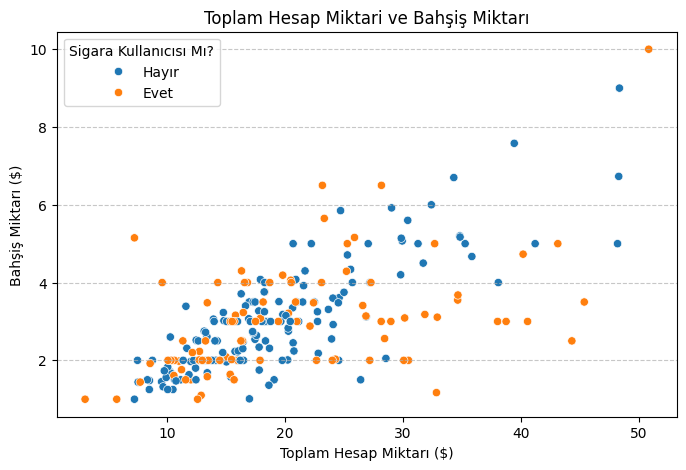

In [40]:
# 1.Görev Toplam Hesap ve Bahşiş arasında scatter plot oluşturma
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(
    data = df,
    x='total_bill',
    y='tip',
    hue='smoker'
);

ax.set(title='Toplam Hesap Miktari ve Bahşiş Miktarı' ,xlabel='Toplam Hesap Miktarı ($)', ylabel='Bahşiş Miktarı ($)');
ax.legend(title='Sigara Kullanıcısı Mı?')
plt.grid(axis="y", linestyle="--", alpha=0.7)

In [41]:
# Ödenen hesap arttıkça verilen bahşişlerde artıyor. Tabi yemek için az ödeyip yüksek bahiş veren gönlü bol bir kaç kişi de gözden kaçmıyor.

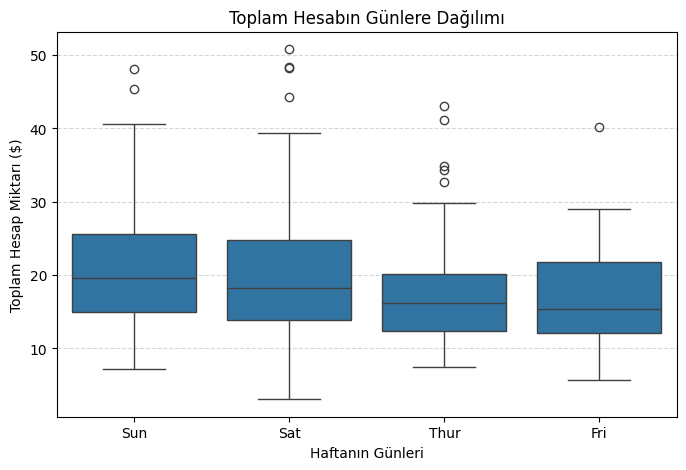

In [42]:
# 2. Günlere göre toplam hesap tutarı boxplot
plt.figure(figsize=(8, 5))
ax2 = sns.boxplot(data=df,
           x='day',
           y='total_bill')
ax2.set(title='Toplam Hesabın Günlere Dağılımı' ,ylabel='Toplam Hesap Miktarı ($)', xlabel='Haftanın Günleri');
plt.grid(axis="y", linestyle="--", alpha=0.5)

In [43]:
# Hafta sonları genel olarak hesap tutarlarının yüksek ve insanların hafta içine göre daha fazla harcama yapma eğiliminde olduğunu gösteriyor. 

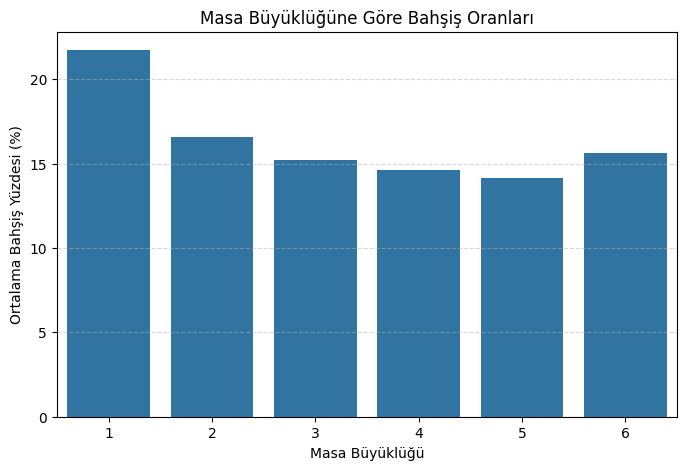

In [44]:
# 3. Masa boyutlarina göre bahşiş yüzdesini hesapla ve bar plot ile görselleştir.
df['tip_rate'] = df['tip'] / df['total_bill'] * 100

plt.figure(figsize=(8, 5))
ax3 = sns.barplot(data=df, x='size', y='tip_rate', estimator=lambda x: x.mean(),  errorbar=None);
ax3.set(title='Masa Büyüklüğüne Göre Bahşiş Oranları', xlabel='Masa Büyüklüğü', ylabel='Ortalama Bahşiş Yüzdesi (%)');
plt.grid(axis="y", linestyle="--", alpha=0.5)

In [45]:
# Tek kişinin daha yüksek bahşiş verdiği ve ortalamada ise %15 civarı bahşiş bırakıldığı gözlemleniyor.

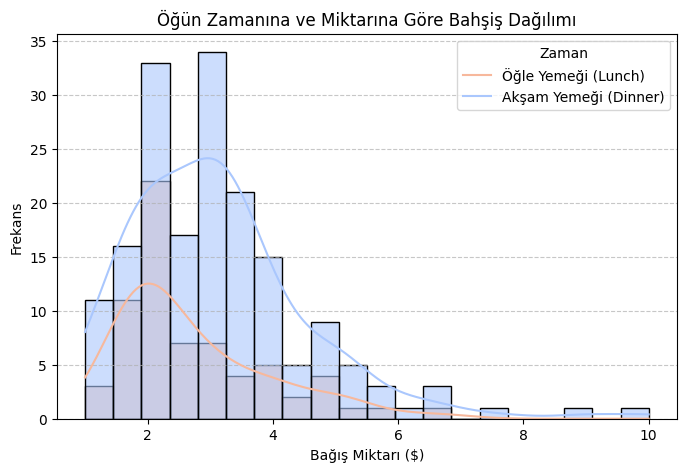

In [46]:
# 4. Günün Zamanına Göre Bahşiş Dağılımı Histogram veya KDE grafiği kullanarak Lunch ve Dinner zamanlarındaki bahşiş dağılımını karşılaştırın.
plt.figure(figsize=(8, 5))
ax4 = sns.histplot(data=df, x="tip", hue="time", bins=20, kde=True, palette="coolwarm", alpha=0.6)

ax4.set(xlabel="Bağış Miktarı ($)", ylabel="Frekans", title="Öğün Zamanına ve Miktarına Göre Bahşiş Dağılımı")
plt.legend(title="Zaman", labels=["Öğle Yemeği (Lunch)", "Akşam Yemeği (Dinner)"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

In [47]:
# Öğle yemeklerinde daha az genellikle 2$ civarında, akşam yemeklerinde ise genellikle 2$-4$ arasında oluyor ve yüksek bahşiş alma ihtimali daha yüksek. 

In [48]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'tip_rate'],
      dtype='object')

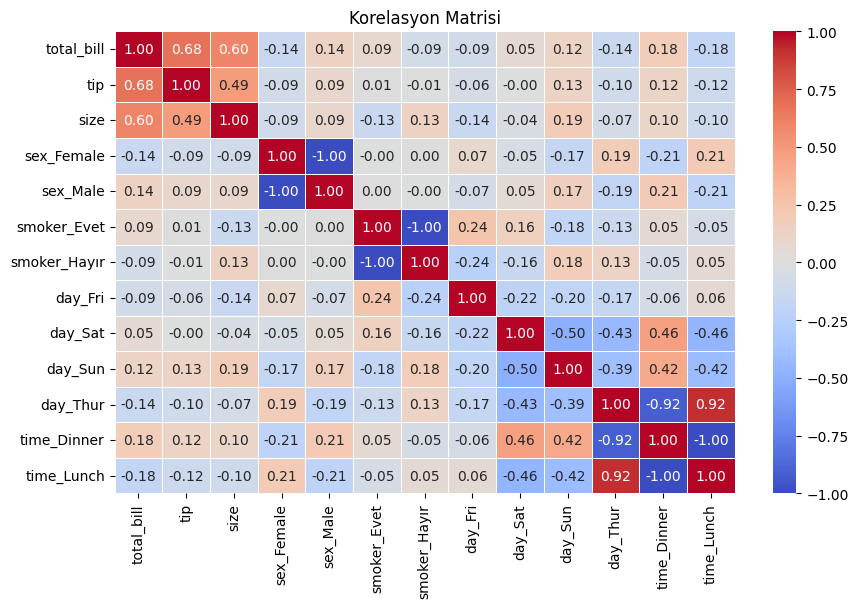

In [93]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop=None, sparse_output=False)
df_oneHotEncode = df.drop(labels=['total_bill', 'tip', 'tip_rate', 'size'], axis=1)
encoded_array = encoder.fit_transform(df_oneHotEncode)
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(df_oneHotEncode.columns))

df_final = pd.concat([df[['total_bill', 'tip', 'size']], encoded_df], axis=1)
corr_matrix = df_final.corr()

plt.figure(figsize=(10, 6))  # Adjust figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()


In [94]:
# Tabloyu incelediğimizde, ikili değerlerin (örneğin, evet/hayır, erkek/kadın) birbirinin tersi olduğunu görüyoruz.
# Bu durumu dummy trap yaparak önlemek isteyebiliriz. 
# Ancak, bu durumda gün kategorileriden birini kaybetmemize neden olur.
# Bu yüzden, drop işlemini manuel olarak yapmalıyız.

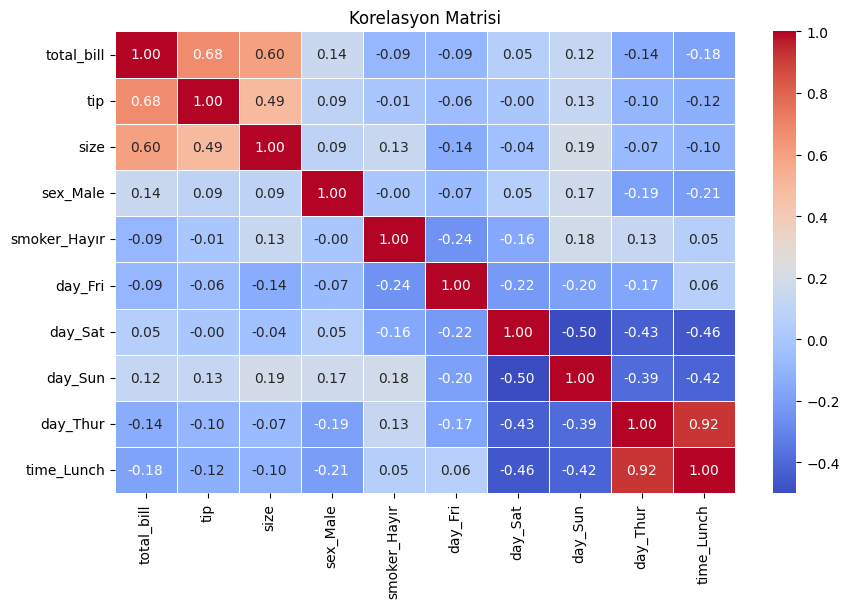

In [95]:
df_edited = corr_matrix.drop(labels=['sex_Female', 'smoker_Evet', 'time_Dinner'], axis=0, errors='ignore')
df_edited = df_edited.drop(labels=['sex_Female', 'smoker_Evet', 'time_Dinner'], axis=1, errors='ignore')


plt.figure(figsize=(10, 6))  # Adjust figure size
sns.heatmap(df_edited, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Korelasyon Matrisi')
plt.show()

In [96]:
# Bu heatmap sayesinde hem daha kolay analiz yapabiliyoruz hem de bilgi kaybı yaşamıyoruz.